<a href="https://colab.research.google.com/github/vcolonnas25/Maestria/blob/main/Semana%202/S2TC1_RandomForests_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [3]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [4]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
data['Price'].describe()

count    10495.000000
mean     14538.403716
std       3922.420961
min       5002.000000
25%      11999.000000
50%      15000.000000
75%      16999.000000
max      32444.000000
Name: Price, dtype: float64

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión manualmente que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [ ]:
# Celda 1


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging manualmente con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 2


### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro max_features igual a log(n_features) y comenten sobre el desempeño del modelo.

In [8]:
# Celda 3
import sklearn
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

n_features=2
base_model = DecisionTreeRegressor(random_state=42,max_depth=5)

bagging_model = BaggingRegressor(base_estimator=base_model,n_estimators=10,max_features=np.log(n_features), random_state=42)
bagging_model.fit(X_train, y_train)

y_pred=bagging_model.predict(X_test)

#Desempeño del modelo
mae_bagging = mean_absolute_error(y_pred, y_test)
rms_bagging =  np.sqrt(mean_squared_error(y_pred, y_test))
print('Mean RMSE:', rms_bagging)
print('Mean MAE:', mae_bagging)

Mean MAE: 1209.2665406544402
Mean RMSE: 1622.3450691556634


### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión y comenten sobre el desempeño del modelo.

In [6]:
# Celda 4
from sklearn.ensemble import RandomForestRegressor

# Definición de modelo Random Forest para regreción
random_forest = RandomForestRegressor()

random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)

In [10]:
#Desempeño del modelo
mae_randomforest = mean_absolute_error(y_pred, y_test)
rms_randomforest=  np.sqrt(mean_squared_error(y_pred, y_test))

#Resultados
print('Mean RMSE:', rms_randomforest)
print('Mean MAE:', mae_randomforest)

Mean RMSE: 1622.3450691556634
Mean MAE: 1209.2665406544402


### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [11]:
# Celda 5
from sklearn.model_selection import cross_val_score
#Calibración de n_estimators

# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 100, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de n_estimators
accuracy_scores = []

for estimator in estimator_range:
    rfr = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(rfr, X, y, cv=5).mean())

Text(0, 0.5, 'Accuracy')

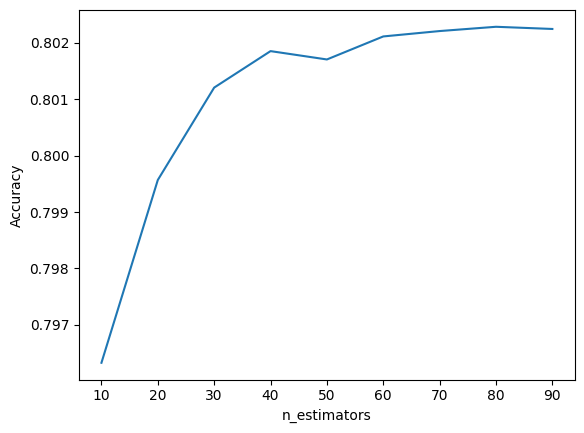

In [12]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [13]:
#Calibracióm max_features

# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_cols=X.shape[1]
feature_range = range(1,feature_cols+1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
accuracy_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    rfl = RandomForestRegressor(n_estimators=200, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(rfl, X, y, cv=5).mean())

Text(0, 0.5, 'Accuracy')

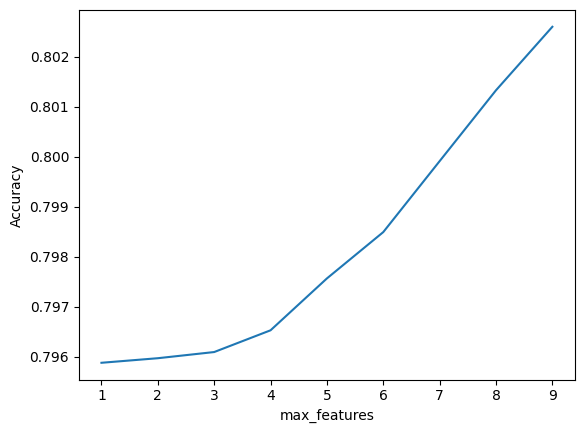

In [14]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

In [15]:
#Implementación de un Random Forest con los mejores parámetros

# Definición del modelo con los parámetros max_features=9 y n_estimators=80  
rfl = RandomForestRegressor(n_estimators=80, max_features=9, random_state=1, n_jobs=-1)
rfl.fit(X_train, y_train)
y_pred = rfl.predict(X_test)

In [17]:
#Desempeño del modelo
mae_rfl = mean_absolute_error(y_pred, y_test)
rmse_rfl = np.sqrt(mean_squared_error(y_pred, y_test))
print('Mean RMSE RFL:', rmse_rfl)
print('Mean MAE RFL:', mae_rfl)

Mean RMSE RFL: 1756.9339917636466
Mean MAE RFL: 1307.245846707471


### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de clasificación con la librería sklearn y comenten sobre el desempeño del modelo.

In [18]:
# Celda 6

from xgboost import XGBRegressor
boost = XGBRegressor()
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)

In [19]:
#Desempeño del modelo
mae_xg = mean_absolute_error(y_pred, y_test)
rmse_xg =  np.sqrt(mean_squared_error(y_pred, y_test))

print('Mean RMSE_XGBoost:', rmse_xg)
print('Mean MAE_XGBoost:', mae_xg )

Mean RMSE_XGBoost: 1621.4197004256812
Mean MAE_XGBoost: 1186.634392366123


### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para clasificación, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 7


### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

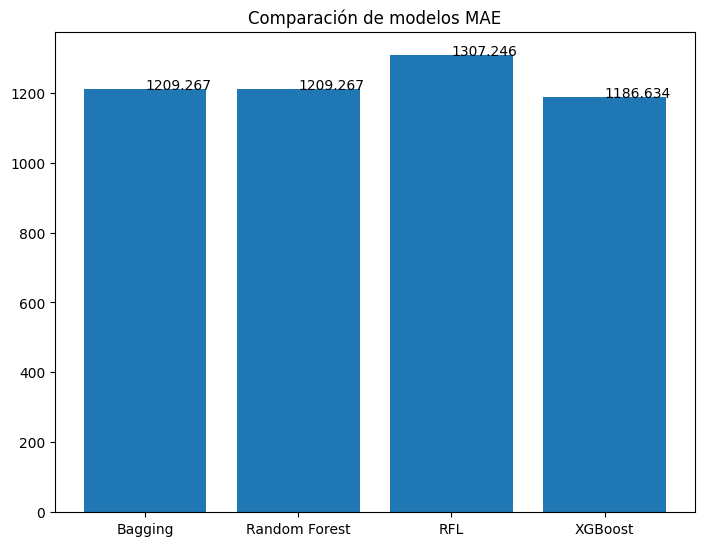

In [20]:
# Celda 8

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#Asignamos el titulo
ax.set_title("Comparación de modelos MAE")

ejeX = [ 'Bagging','Random Forest','RFL', 'XGBoost']
ejeY = [round(mae_bagging,3),round(mae_randomforest,3),round(mae_rfl,3),round(mae_xg,3)]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()